In [12]:
# Import necessary libraries
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
# Replace 'your_path_here' with the actual paths to your CSV files
application_path = '/kaggle/input/a-credit-card-dataset-for-machine-exam/application_record.csv'
credit_path = '/kaggle/input/a-credit-card-dataset-for-machine-exam/credit_record.csv'

# Loading the datasets
application = pd.read_csv(application_path)
credit = pd.read_csv(credit_path)

# Merging the datasets based on a common column (e.g., 'ID' is the key for merging)
# Replace 'ID' with the actual column name that links the datasets
merged_data = pd.merge(application, credit, on='ID', how='inner')

# Display the first few rows and dimensions of the merged dataset
print("Merged Dataset Preview:")
print(merged_data.head())

print(f"Merged dataset dimensions: {merged_data.shape}")



Merged Dataset Preview:
        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008804           M            Y               Y             0   
2  5008804           M            Y               Y             0   
3  5008804           M            Y               Y             0   
4  5008804           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          427500.0          Working    Higher education     Civil marriage   
1          427500.0          Working    Higher education     Civil marriage   
2          427500.0          Working    Higher education     Civil marriage   
3          427500.0          Working    Higher education     Civil marriage   
4          427500.0          Working    Higher education     Civil marriage   

  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
0  Rent

In [13]:
# Checking the structure and basic info of the merged dataset
print("Merged Dataset Info:")
print(merged_data.info())


Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 

In [14]:
# Displaying summary statistics for numerical columns in the merged dataset
print("Merged Dataset Summary:")
print(merged_data.describe())


Merged Dataset Summary:
                 ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
count  7.777150e+05  777715.000000      7.777150e+05  777715.000000   
mean   5.078743e+06       0.428082      1.885348e+05  -16124.937046   
std    4.180442e+04       0.745755      1.016225e+05    4104.304018   
min    5.008804e+06       0.000000      2.700000e+04  -25152.000000   
25%    5.044568e+06       0.000000      1.215000e+05  -19453.000000   
50%    5.069530e+06       0.000000      1.620000e+05  -15760.000000   
75%    5.115551e+06       1.000000      2.250000e+05  -12716.000000   
max    5.150487e+06      19.000000      1.575000e+06   -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE  \
count  777715.000000    777715.0    777715.000000  777715.000000   
mean    57775.825016         1.0         0.231818       0.300965   
std    136471.735391         0.0         0.421993       0.458678   
min    -15713.000000         1.0         0.000000       0.000000

In [15]:
# Checking for missing values in the merged dataset
print("Missing values in the Merged Dataset:")
print(merged_data.isnull().sum())


Missing values in the Merged Dataset:
ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64


In [16]:
# Fill missing categorical values with the mode
merged_data['OCCUPATION_TYPE'].fillna(merged_data['OCCUPATION_TYPE'].mode()[0], inplace=True)
# Verifying that missing values have been handled
print("Missing values after cleaning (Merged Dataset):")
print(merged_data.isnull().sum())

# Checking the dimensions after cleaning
print(f"Cleaned dataset dimensions: {merged_data.shape}")

Missing values after cleaning (Merged Dataset):


/tmp/ipykernel_23/4074167833.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['OCCUPATION_TYPE'].fillna(merged_data['OCCUPATION_TYPE'].mode()[0], inplace=True)


ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64
Cleaned dataset dimensions: (777715, 20)


In [17]:
# Checking for duplicates in the dataset
print(f"Number of duplicate rows in the dataset: {merged_data.duplicated().sum()}")

# Removing duplicate rows
merged_data = merged_data.drop_duplicates()

# Verifying that duplicates have been removed
print(f"Number of duplicate rows after removal: {merged_data.duplicated().sum()}")
print(f"Dataset dimensions after duplicate removal: {merged_data.shape}")


Number of duplicate rows in the dataset: 0
Number of duplicate rows after removal: 0
Dataset dimensions after duplicate removal: (777715, 20)


In [18]:
# Checking for unique values in each column
# This helps identify categorical columns or columns that may need further processing.

for column in merged_data.columns:
    print(f"{column}: {merged_data[column].nunique()} unique values")


ID: 36457 unique values
CODE_GENDER: 2 unique values
FLAG_OWN_CAR: 2 unique values
FLAG_OWN_REALTY: 2 unique values
CNT_CHILDREN: 9 unique values
AMT_INCOME_TOTAL: 265 unique values
NAME_INCOME_TYPE: 5 unique values
NAME_EDUCATION_TYPE: 5 unique values
NAME_FAMILY_STATUS: 5 unique values
NAME_HOUSING_TYPE: 6 unique values
DAYS_BIRTH: 7183 unique values
DAYS_EMPLOYED: 3640 unique values
FLAG_MOBIL: 1 unique values
FLAG_WORK_PHONE: 2 unique values
FLAG_PHONE: 2 unique values
FLAG_EMAIL: 2 unique values
OCCUPATION_TYPE: 18 unique values
CNT_FAM_MEMBERS: 10 unique values
MONTHS_BALANCE: 61 unique values
STATUS: 8 unique values


In [19]:
# # Label Encoding: Converting categorical variables to numeric
# # Replace 'categorical_columns' with the list of categorical column names from your dataset

# categorical_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
#                        'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
#                        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'STATUS']

# for col in categorical_columns:
#     merged_data[col] = merged_data[col].astype('category').cat.codes

# print("Dataset after Label Encoding:")
# print(merged_data.head())


In [20]:
# Checking the value counts of the 'STATUS' column
print("Value counts for the 'STATUS' column before mapping:")
print(merged_data['STATUS'].value_counts())

# Defining the mapping for the 'STATUS' column
status_mapping = {
    'C': 'no past dues',
    '0': 'no past dues',
    'X': 'no past dues',
    '1': 'past dues',
    '2': 'past dues',
    '3': 'past dues',
    '4': 'past dues',
    '5': 'past dues'
}

# Applying the mapping to the 'STATUS' column
merged_data['STATUS'] = merged_data['STATUS'].map(status_mapping)

# Checking the value counts after mapping
print("Value counts for the 'STATUS' column after mapping:")
print(merged_data['STATUS'].value_counts())


Value counts for the 'STATUS' column before mapping:
STATUS
C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: count, dtype: int64
Value counts for the 'STATUS' column after mapping:
STATUS
no past dues    766140
past dues        11575
Name: count, dtype: int64


In [21]:
# Convert 'MONTHS_BALANCE' to positive by multiplying by -1
if 'MONTHS_BALANCE' in merged_data.columns:
    merged_data['MONTHS_BALANCE'] = merged_data['MONTHS_BALANCE'] * -1
    print("'MONTHS_BALANCE' column values converted to positive.")

# Replace positive values in 'DAYS_EMPLOYED' with 0
col_name = 'DAYS_EMPLOYED'
if col_name in merged_data.columns:
    merged_data[col_name] = merged_data[col_name].apply(lambda x: 0 if x > 0 else x)
    print(f"Positive values in '{col_name}' replaced with 0.")

# Convert 'DAYS_EMPLOYED' and 'DAYS_BIRTH' to positive by multiplying by -1
for col in ['DAYS_EMPLOYED', 'DAYS_BIRTH']:
    if col in merged_data.columns:
        merged_data[col] = merged_data[col] * -1
        print(f"'{col}' column values converted to positive.")

# Display the first few rows of the transformed dataset
print("Transformed Dataset Preview:")
print(merged_data.head())


'MONTHS_BALANCE' column values converted to positive.
Positive values in 'DAYS_EMPLOYED' replaced with 0.
'DAYS_EMPLOYED' column values converted to positive.
'DAYS_BIRTH' column values converted to positive.
Transformed Dataset Preview:
        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008804           M            Y               Y             0   
2  5008804           M            Y               Y             0   
3  5008804           M            Y               Y             0   
4  5008804           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          427500.0          Working    Higher education     Civil marriage   
1          427500.0          Working    Higher education     Civil marriage   
2          427500.0          Working    Higher education     Civil marriage   
3          427500.0          Wo

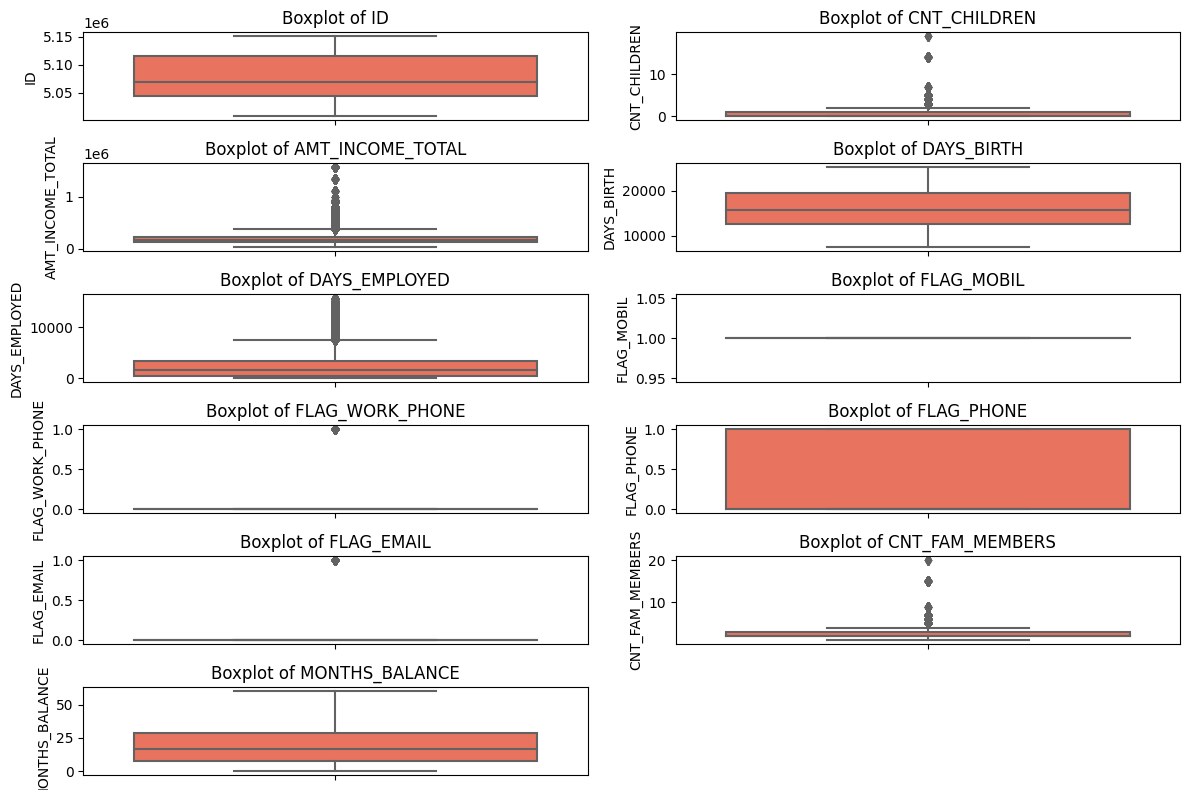

In [22]:
# Select numeric columns
numeric_columns = merged_data.select_dtypes(include=['number']).columns

# Create boxplots for all numeric columns
plt.figure(figsize=(12, 8))

# Loop through each numeric column and create a boxplot
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 2 + 1, 2, i)  # Adjusting subplot layout
    sns.boxplot(data=merged_data, y=col, color='tomato')
    plt.title(f"Boxplot of {col}", fontsize=12)
    plt.ylabel(col, fontsize=10)

plt.tight_layout()  # Adjust layout to fit all plots
plt.show()


In [23]:
import numpy as np

# Function to handle outliers using the IQR method
def handle_outliers(x, coef=1.5):
    # Calculate Q1, Q3, and IQR
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    lower_bound = q1 - coef * iqr
    upper_bound = q3 + coef * iqr
    
    # Replace values below lower bound with lower bound and above upper bound with upper bound
    x = np.where(x < lower_bound, lower_bound, x)
    x = np.where(x > upper_bound, upper_bound, x)
    
    return x

# Handle outliers in the 'AMT_INCOME_TOTAL' column
if 'AMT_INCOME_TOTAL' in merged_data.columns:
    merged_data['AMT_INCOME_TOTAL'] = handle_outliers(merged_data['AMT_INCOME_TOTAL'])

# Handle outliers in the 'CNT_CHILDREN' column
if 'CNT_CHILDREN' in merged_data.columns:
    merged_data['CNT_CHILDREN'] = handle_outliers(merged_data['CNT_CHILDREN'])

# Handle outliers in the 'CNT_FAM_MEMBERS' column
if 'CNT_FAM_MEMBERS' in merged_data.columns:
    merged_data['CNT_FAM_MEMBERS'] = handle_outliers(merged_data['CNT_FAM_MEMBERS'])
    
if 'CNT_FAM_MEMBERS' in merged_data.columns:
    merged_data['DAYS_EMPLOYED'] = handle_outliers(merged_data['DAYS_EMPLOYED'])
# Verifying the outlier handling
print("Outliers handled successfully.")
print(merged_data[['AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS']].describe())



Outliers handled successfully.
       AMT_INCOME_TOTAL   CNT_CHILDREN  CNT_FAM_MEMBERS
count     777715.000000  777715.000000    777715.000000
mean      183381.285621       0.416648         2.197983
std        81920.449447       0.690885         0.863799
min        27000.000000       0.000000         1.000000
25%       121500.000000       0.000000         2.000000
50%       162000.000000       0.000000         2.000000
75%       225000.000000       1.000000         3.000000
max       380250.000000       2.500000         4.500000


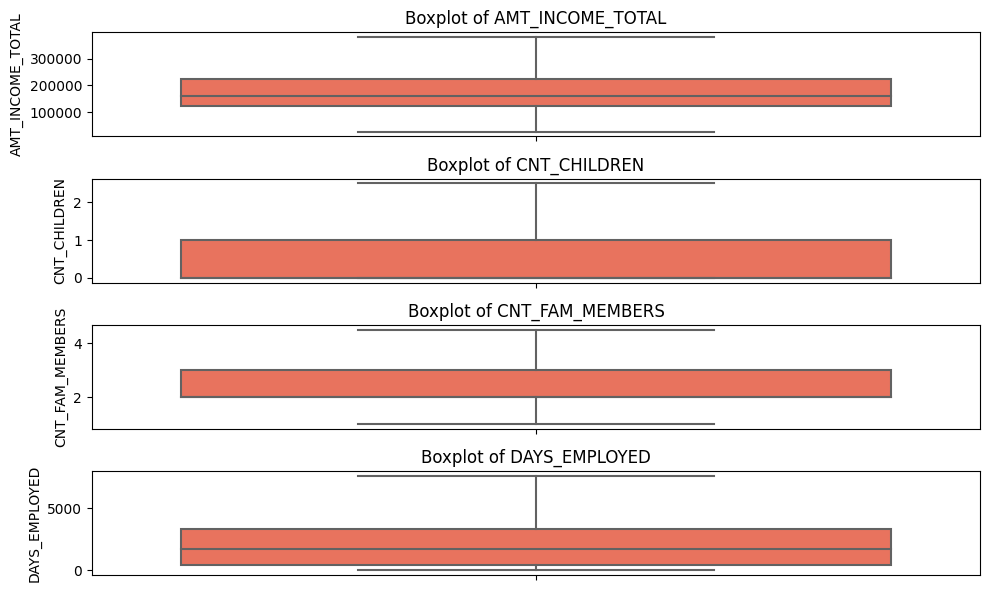

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
# ensuring outliers are removed
# Define the specific columns you want boxplots for
columns_to_plot = ['AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'DAYS_EMPLOYED']  # Example columns

# Create boxplots for the specified columns
plt.figure(figsize=(10, 6))

# Loop through each specified column and create a boxplot
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)  # Adjusting subplot layout
    sns.boxplot(data=merged_data, y=col, color='tomato')
    plt.title(f"Boxplot of {col}", fontsize=12)
    plt.ylabel(col, fontsize=10)

plt.tight_layout()  # Adjust layout to fit all plots
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


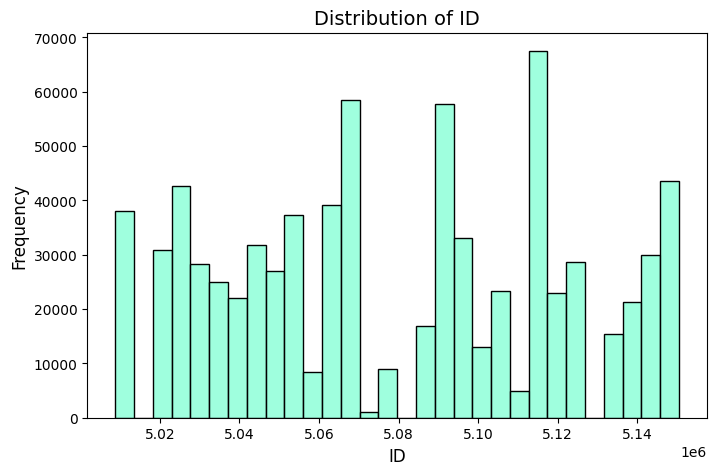

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


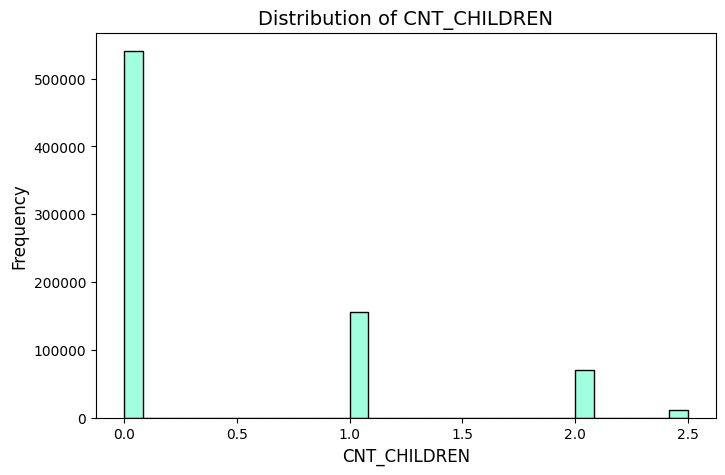

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


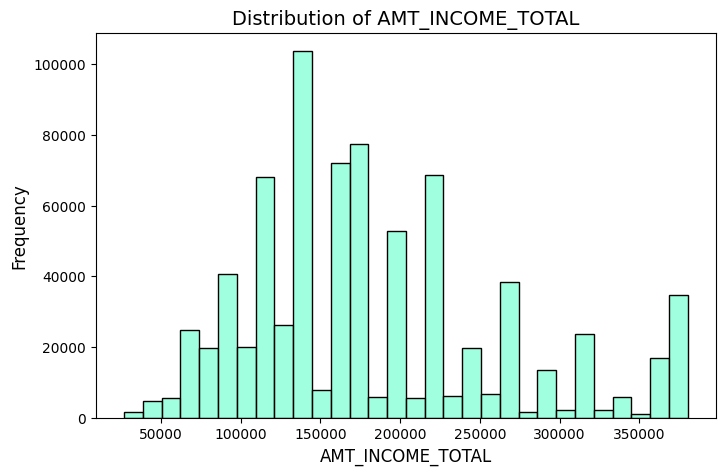

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


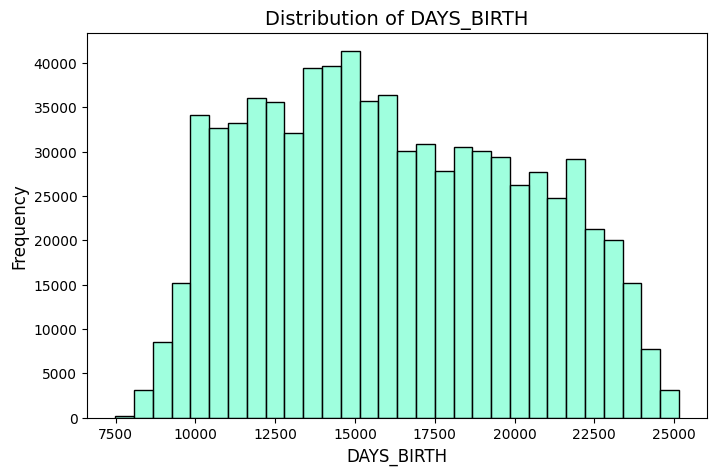

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


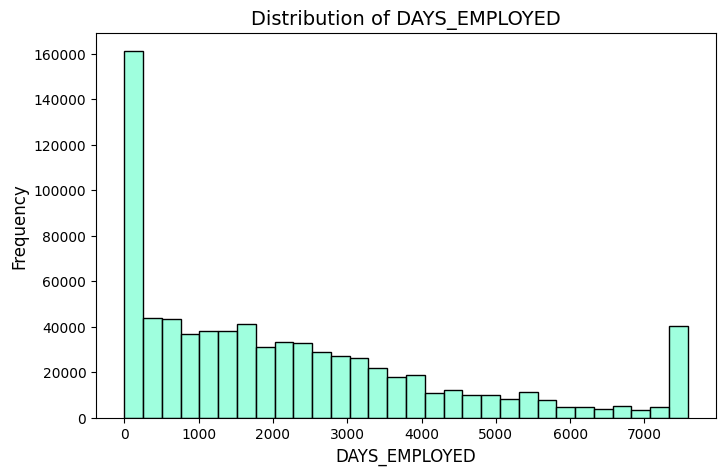

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


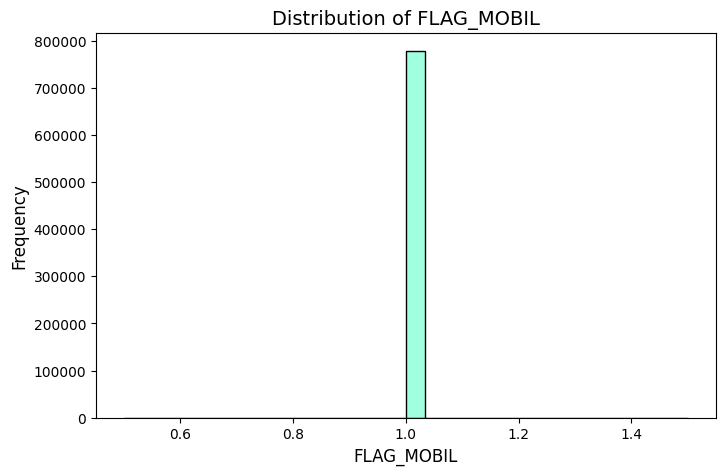

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


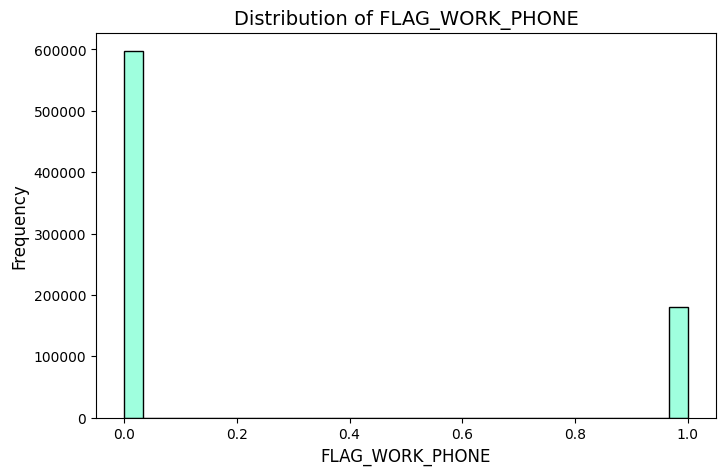

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


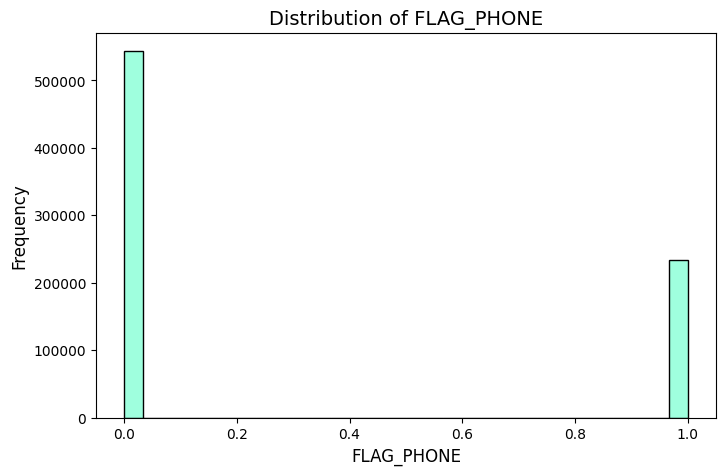

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


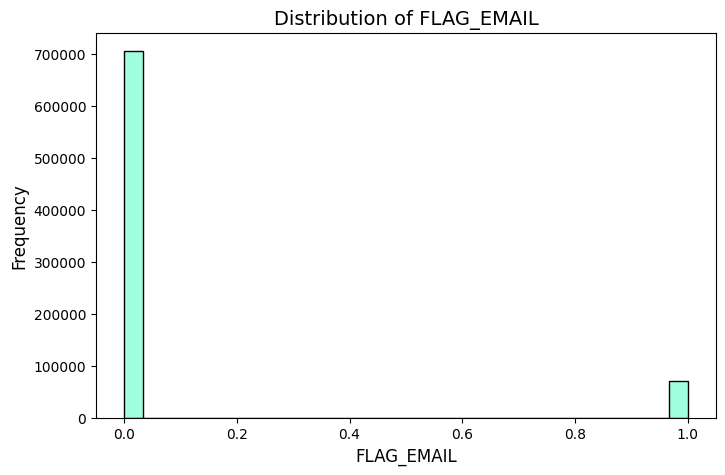

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


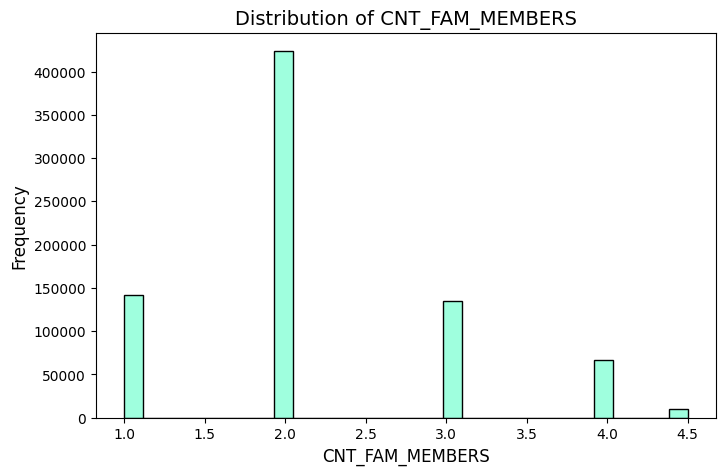

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


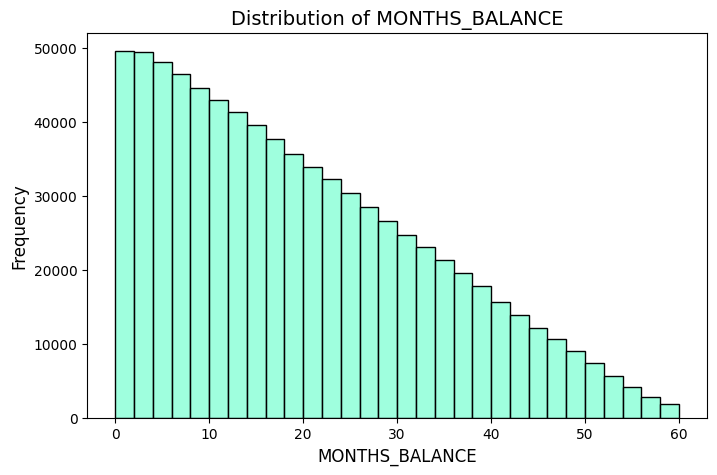

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
# getting a sense of the data distribution/visualization
# Select numeric columns
numeric_columns = merged_data.select_dtypes(include=['number']).columns

# Create histograms for all numeric columns
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=merged_data, x=col, color='aquamarine', edgecolor='black', bins=30)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()


In [26]:
# copy the "STATUS" column before modifying it, to use later.
status_col = merged_data['STATUS']
# Convert 'STATUS' to numeric using pandas' factorization
merged_data['STATUS'] = pd.factorize(merged_data['STATUS'])[0]


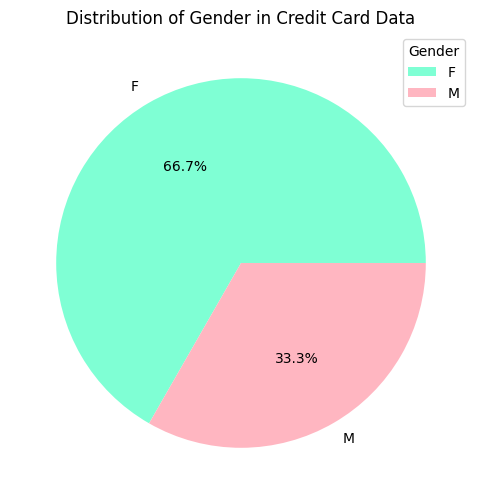

In [27]:
import matplotlib.pyplot as plt

# Calculate gender counts and percentages
gender_counts = merged_data['CODE_GENDER'].value_counts()
gender_percentages = (gender_counts / gender_counts.sum() * 100).round(1)

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_percentages.index, autopct='%1.1f%%', colors=['aquamarine', 'lightpink'])
plt.title('Distribution of Gender in Credit Card Data')
plt.legend(title="Gender")
plt.show()


/tmp/ipykernel_23/2511732976.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, count + 5, f"{count}\n({percentages[i]}%)", ha='center')


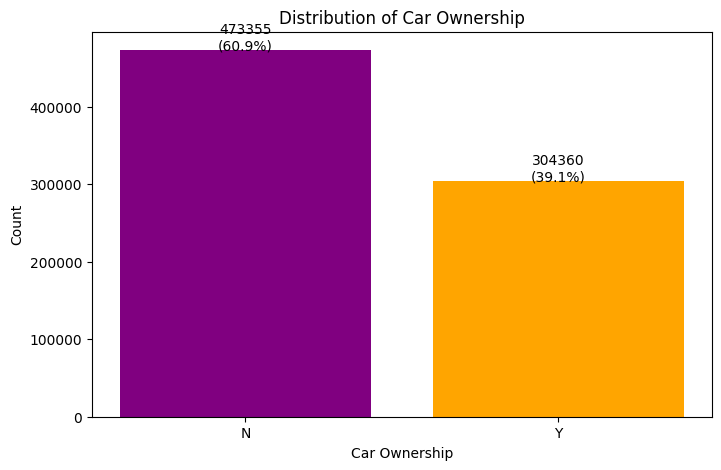

In [28]:
# Calculate car ownership counts and percentages
car_ownership_counts = merged_data['FLAG_OWN_CAR'].value_counts()
percentages = (car_ownership_counts / car_ownership_counts.sum() * 100).round(1)

# Create a bar plot
plt.figure(figsize=(8, 5))
bar_positions = range(len(car_ownership_counts))
plt.bar(bar_positions, car_ownership_counts, color=['purple', 'orange'])
plt.xticks(bar_positions, car_ownership_counts.index)
plt.title('Distribution of Car Ownership')
plt.xlabel('Car Ownership')
plt.ylabel('Count')

# Add labels
for i, count in enumerate(car_ownership_counts):
    plt.text(i, count + 5, f"{count}\n({percentages[i]}%)", ha='center')

plt.show()


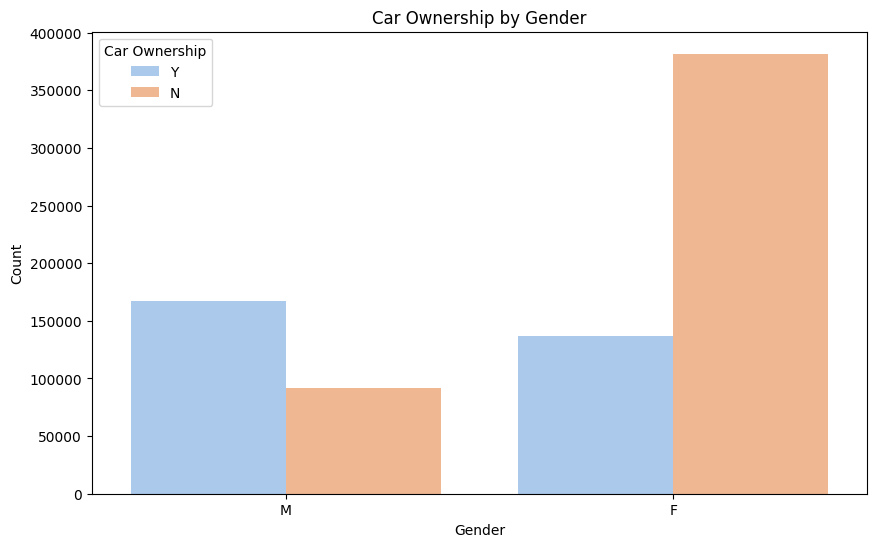

In [29]:
import seaborn as sns

# Create a bar plot for car ownership by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='CODE_GENDER', hue='FLAG_OWN_CAR', palette='pastel')
plt.title('Car Ownership by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Car Ownership')
plt.show()


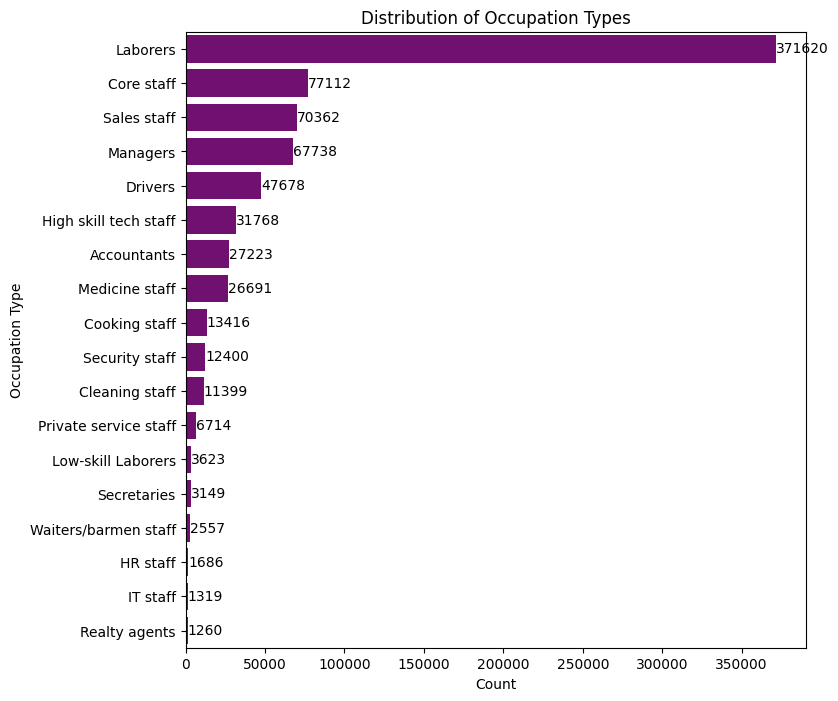

In [30]:
# Count occupation types and sort
occupation_counts = merged_data['OCCUPATION_TYPE'].value_counts().sort_values(ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(8, 8))
sns.barplot(x=occupation_counts.values, y=occupation_counts.index, color='purple')
plt.title('Distribution of Occupation Types')
plt.xlabel('Count')
plt.ylabel('Occupation Type')

# Add count labels
for i, count in enumerate(occupation_counts):
    plt.text(count, i, f'{count}', va='center')

plt.show()


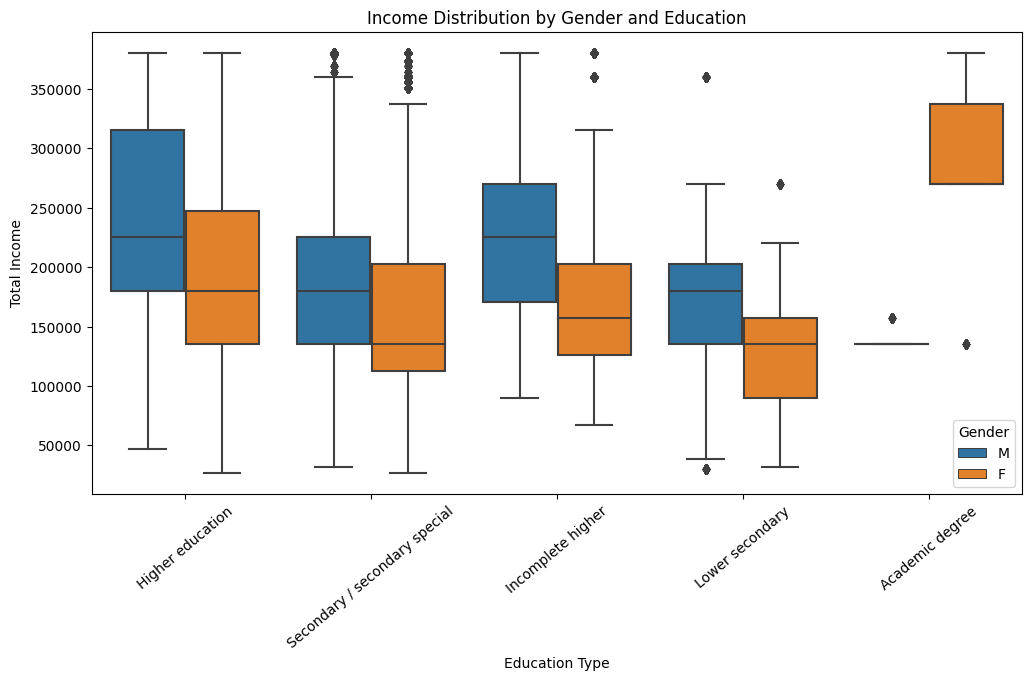

In [31]:
# Create boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', hue='CODE_GENDER')
plt.title('Income Distribution by Gender and Education')
plt.xlabel('Education Type')
plt.ylabel('Total Income')
plt.xticks(rotation=40)
plt.legend(title='Gender')
plt.show()


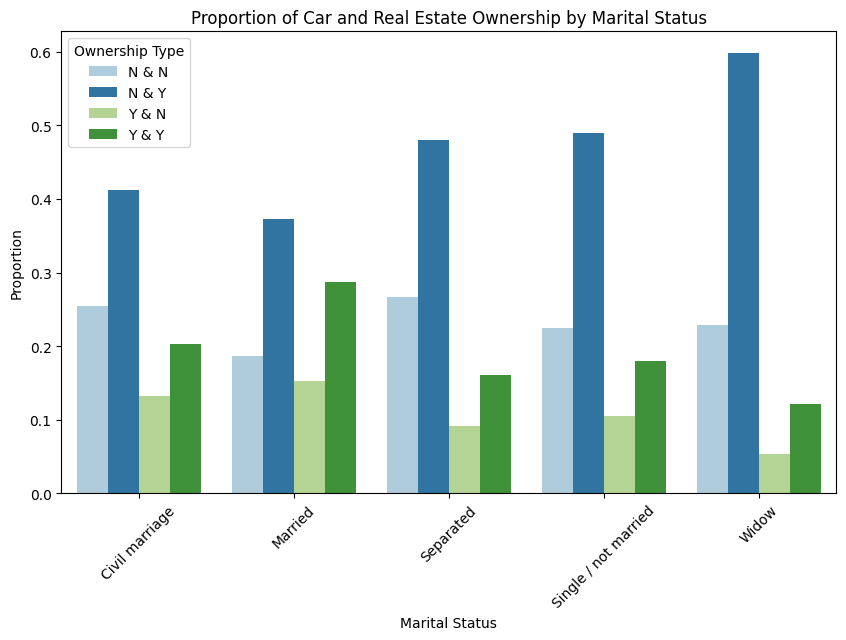

In [32]:
# Create a new column combining car and real estate ownership statuses
merged_data['Ownership_Status'] = merged_data['FLAG_OWN_CAR'] + ' & ' + merged_data['FLAG_OWN_REALTY']

# Calculate proportions
ownership_data = merged_data.groupby(['NAME_FAMILY_STATUS', 'Ownership_Status']).size().reset_index(name='Count')
ownership_data['Proportion'] = ownership_data.groupby('NAME_FAMILY_STATUS')['Count'].transform(lambda x: x / x.sum())

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=ownership_data, x='NAME_FAMILY_STATUS', y='Proportion', hue='Ownership_Status', palette='Paired')
plt.title('Proportion of Car and Real Estate Ownership by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion')
plt.legend(title='Ownership Type')
plt.xticks(rotation=45)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


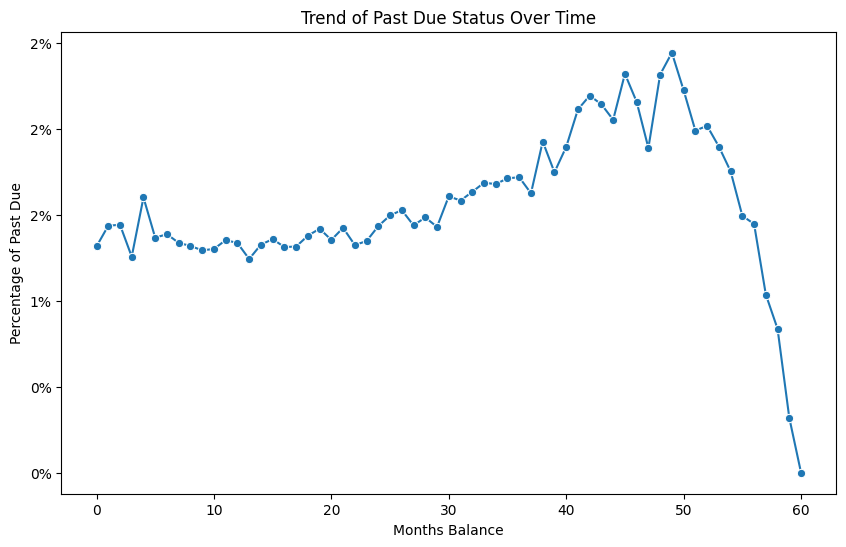

In [33]:
# Calculate proportion of past dues for each month
trend_data = merged_data.groupby('MONTHS_BALANCE')['STATUS'].apply(lambda x: (x == 1).mean()).reset_index(name='Proportion_Past_Due')

# Create line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_data, x='MONTHS_BALANCE', y='Proportion_Past_Due', marker='o')
plt.title('Trend of Past Due Status Over Time')
plt.xlabel('Months Balance')
plt.ylabel('Percentage of Past Due')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


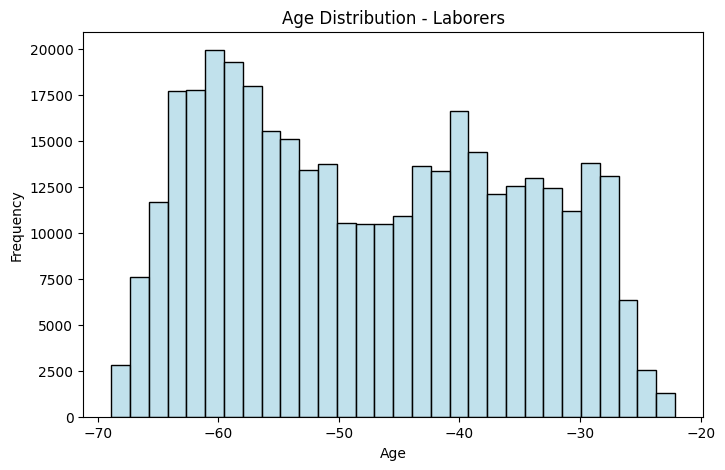

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


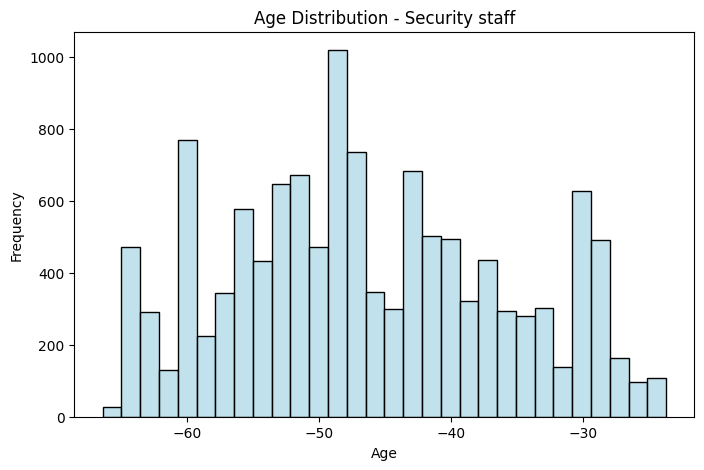

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


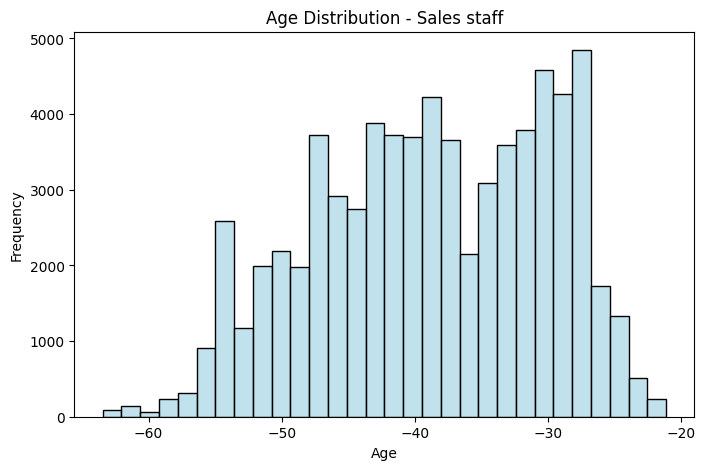

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


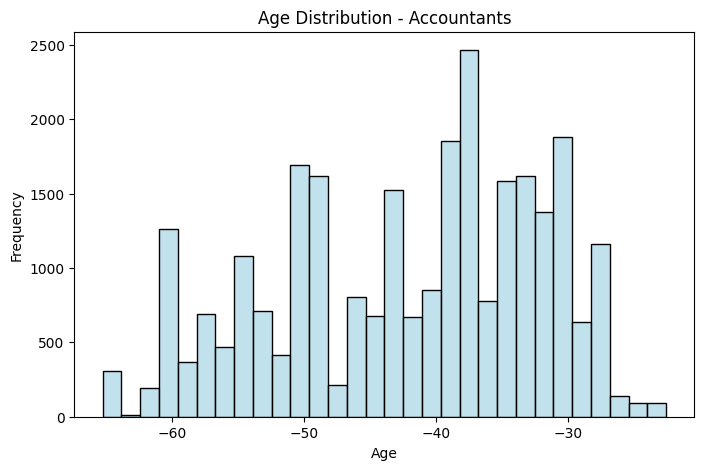

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


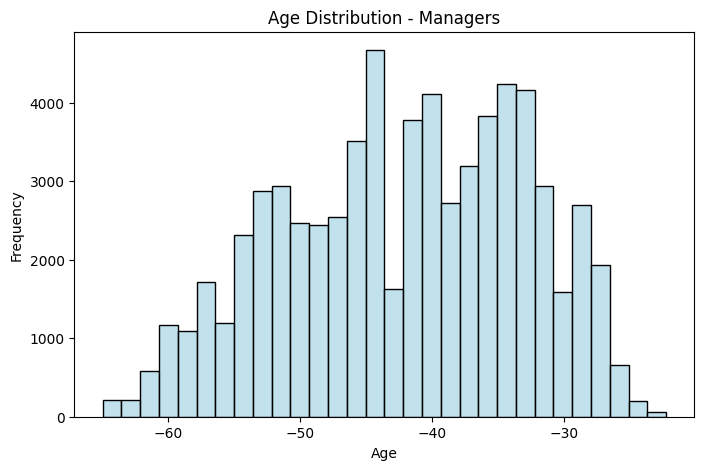

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


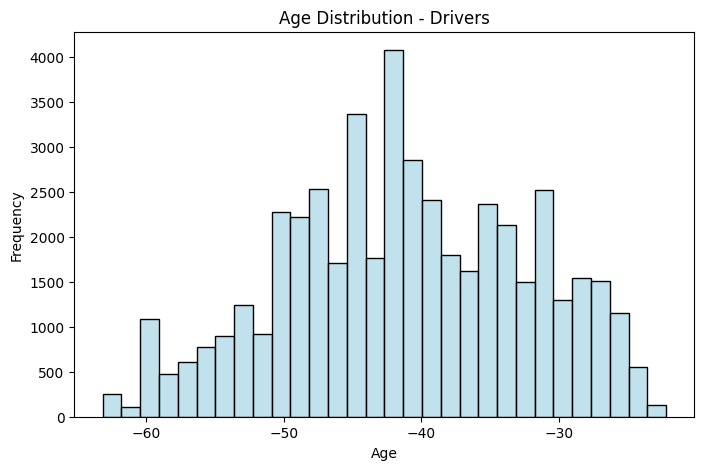

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


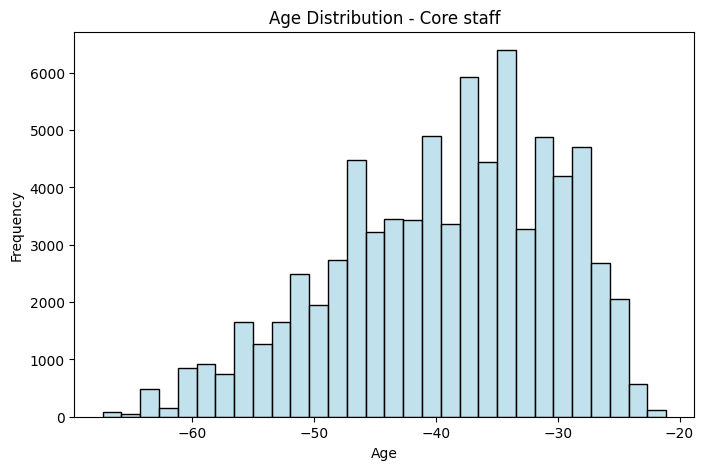

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


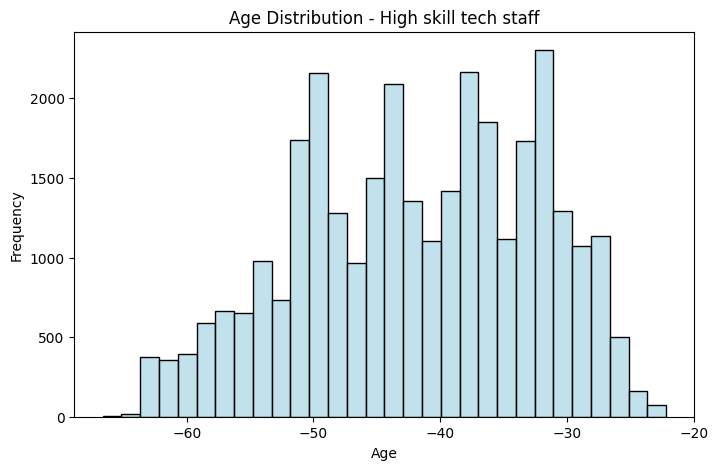

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


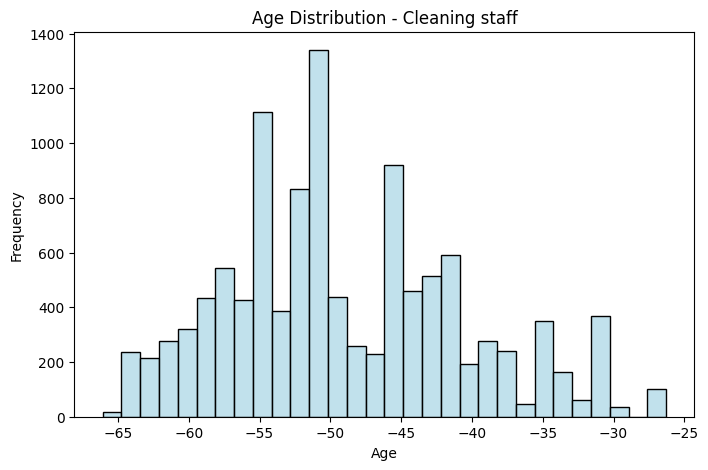

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


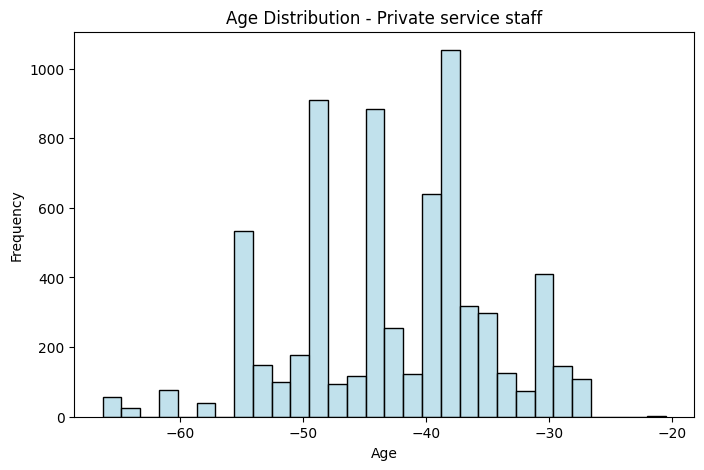

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


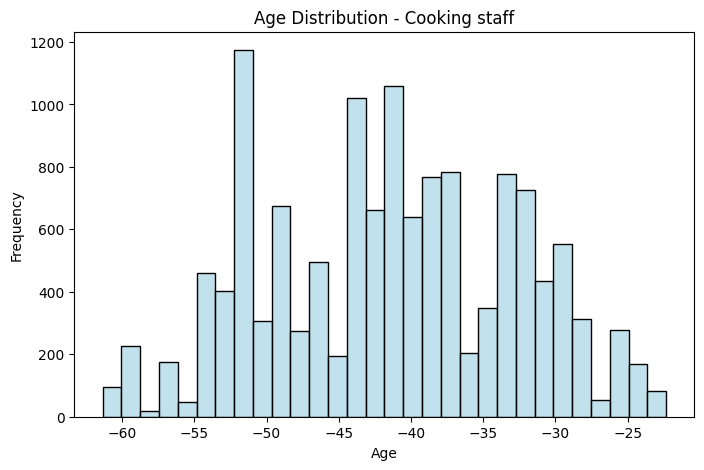

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


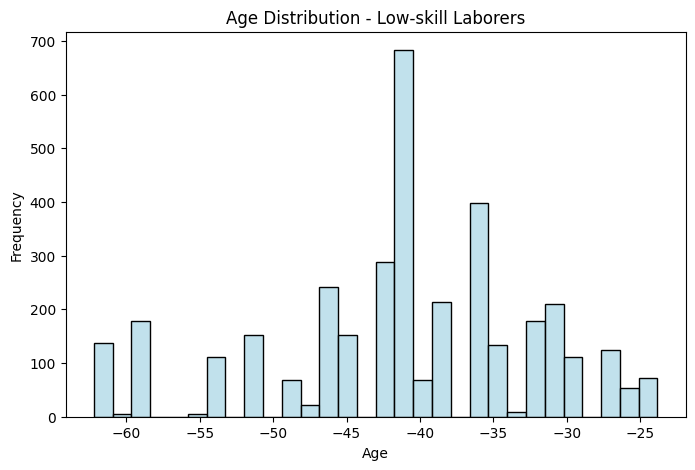

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


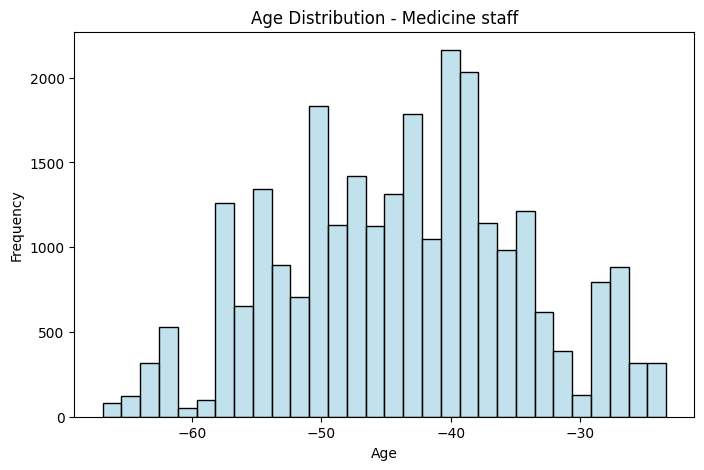

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


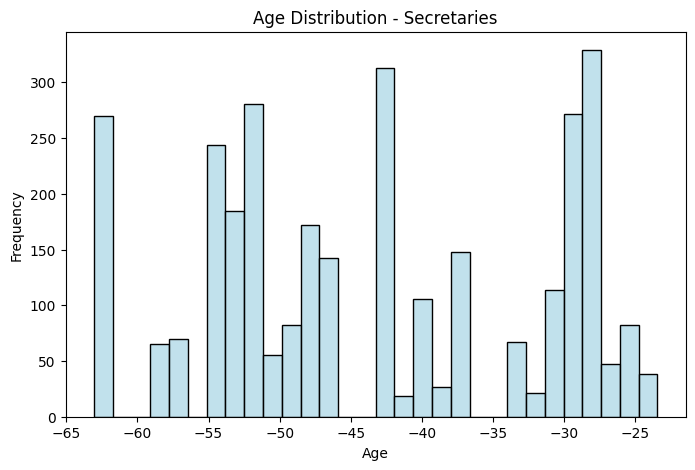

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


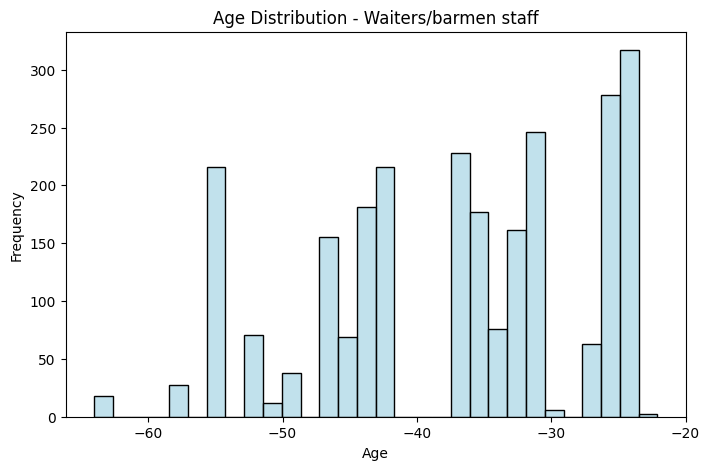

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


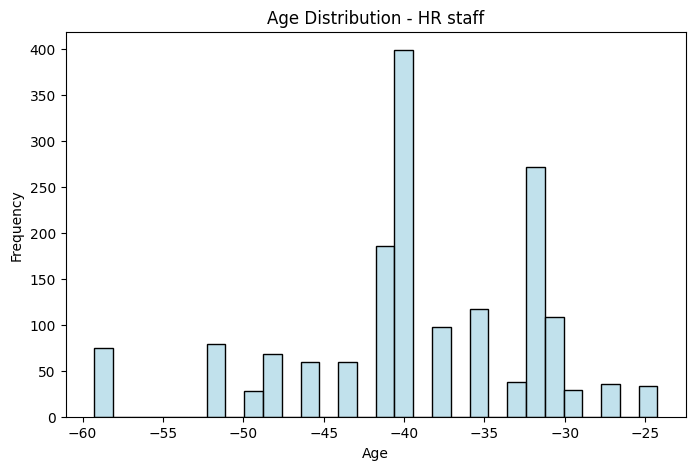

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


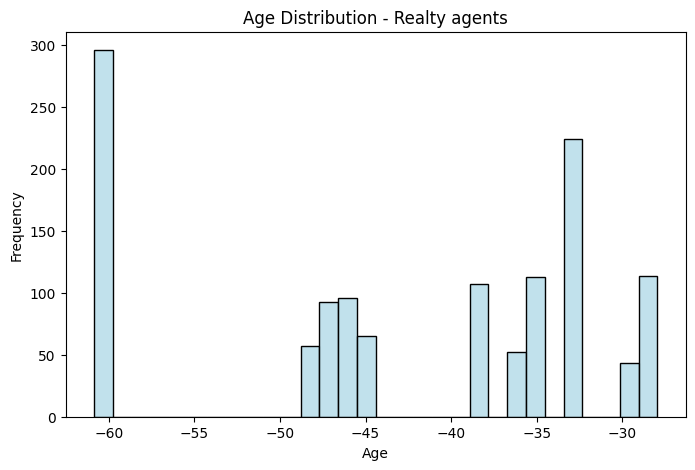

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


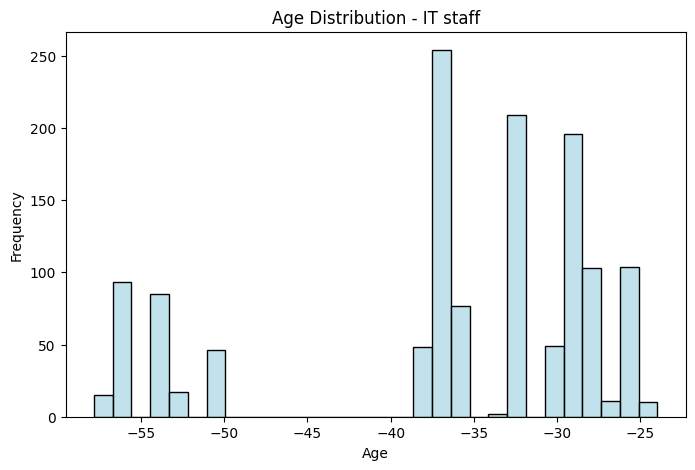

In [34]:
# Calculate age from DAYS_BIRTH
merged_data['Age'] = (-merged_data['DAYS_BIRTH']) / 365.25

# Unique occupation types
occupation_types = merged_data['OCCUPATION_TYPE'].dropna().unique()

# Plot age distribution for each occupation type
for occupation in occupation_types:
    plt.figure(figsize=(8, 5))
    subset = merged_data[merged_data['OCCUPATION_TYPE'] == occupation]
    sns.histplot(data=subset, x='Age', bins=30, color='lightblue', kde=False)
    plt.title(f'Age Distribution - {occupation}')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()


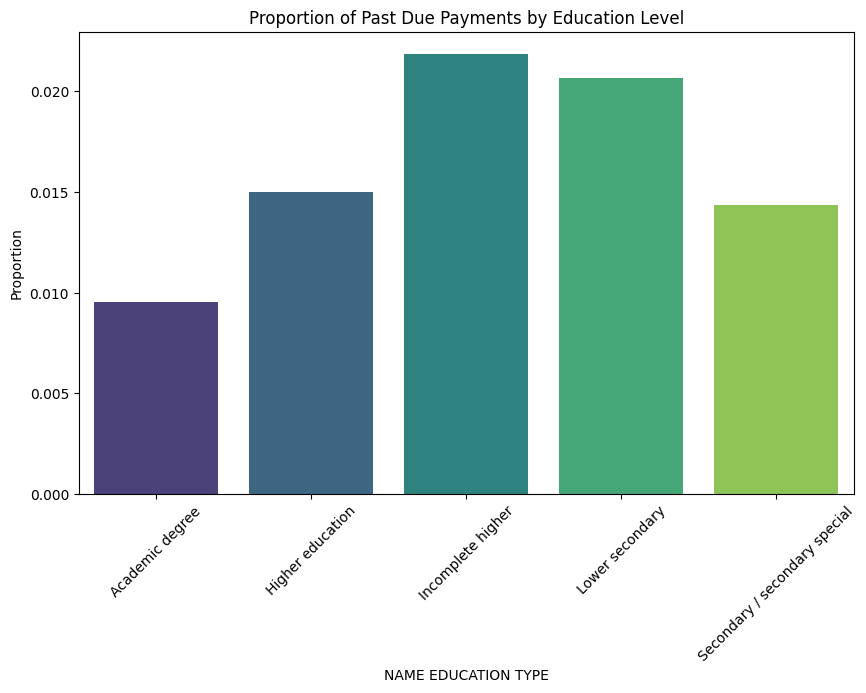

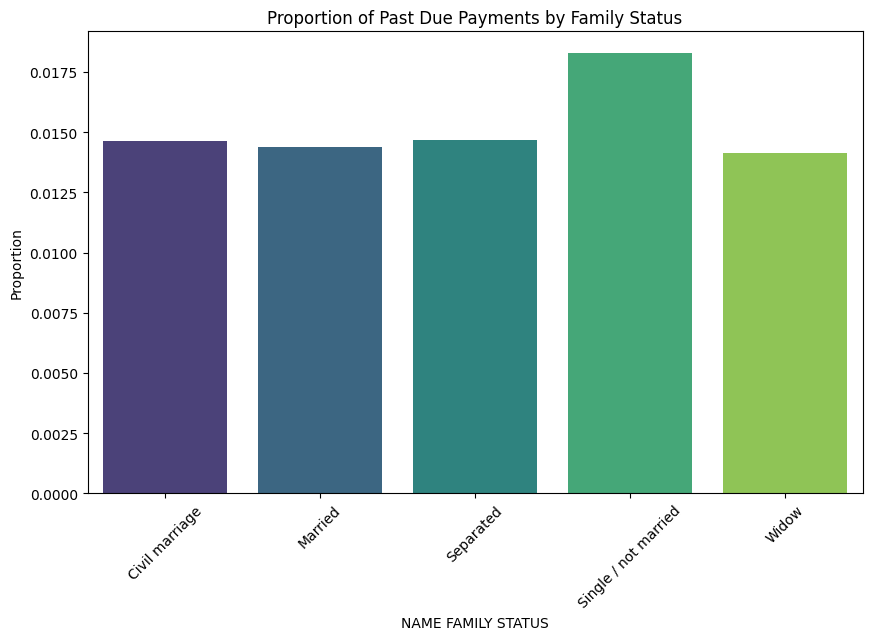

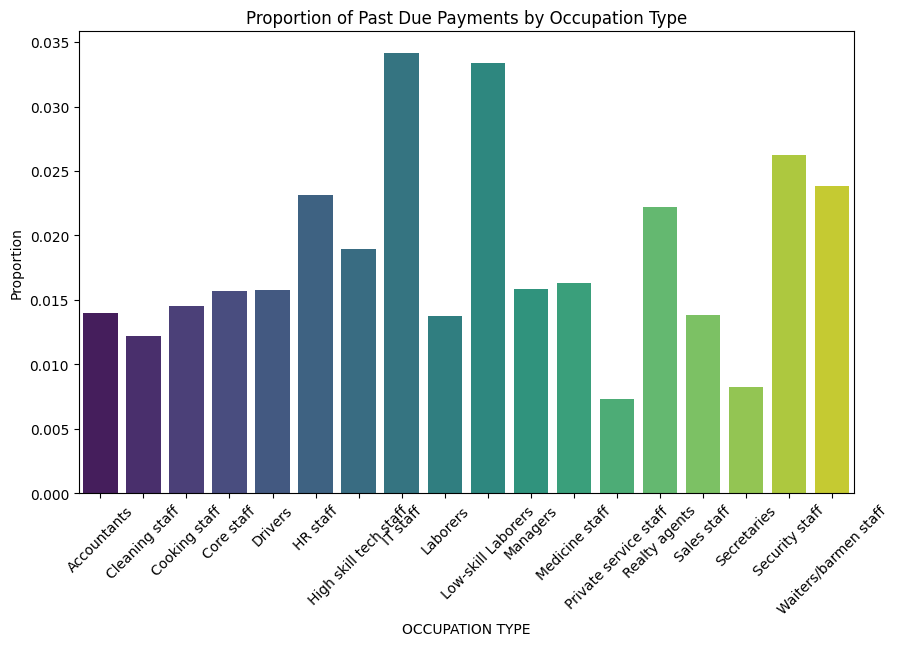

In [35]:
# Summarize proportions
education_summary = merged_data.groupby('NAME_EDUCATION_TYPE')['STATUS'].apply(lambda x: (x == 1).mean()).reset_index(name='Proportion_Past_Due')
family_status_summary = merged_data.groupby('NAME_FAMILY_STATUS')['STATUS'].apply(lambda x: (x == 1).mean()).reset_index(name='Proportion_Past_Due')
occupation_summary = merged_data.groupby('OCCUPATION_TYPE')['STATUS'].apply(lambda x: (x == 1).mean()).reset_index(name='Proportion_Past_Due')

# Plot bar charts
for data, title, x_label in zip(
    [education_summary, family_status_summary, occupation_summary],
    ['Proportion of Past Due Payments by Education Level', 
     'Proportion of Past Due Payments by Family Status', 
     'Proportion of Past Due Payments by Occupation Type'],
    ['NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE']
):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x=x_label, y='Proportion_Past_Due', palette='viridis')
    plt.title(title)
    plt.xlabel(x_label.replace('_', ' '))
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()


In [36]:
# Convert categorical columns to numeric using pandas' factorization
columns_to_convert = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
    'OCCUPATION_TYPE','Ownership_Status'
]

for column in columns_to_convert:
    if column in merged_data.columns:  # Check if column exists in the dataset
        merged_data[column] = pd.factorize(merged_data[column])[0]

# Check the updated dataset
merged_data.head()
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  int64  
 2   FLAG_OWN_CAR         777715 non-null  int64  
 3   FLAG_OWN_REALTY      777715 non-null  int64  
 4   CNT_CHILDREN         777715 non-null  float64
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  int64  
 7   NAME_EDUCATION_TYPE  777715 non-null  int64  
 8   NAME_FAMILY_STATUS   777715 non-null  int64  
 9   NAME_HOUSING_TYPE    777715 non-null  int64  
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  float64
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

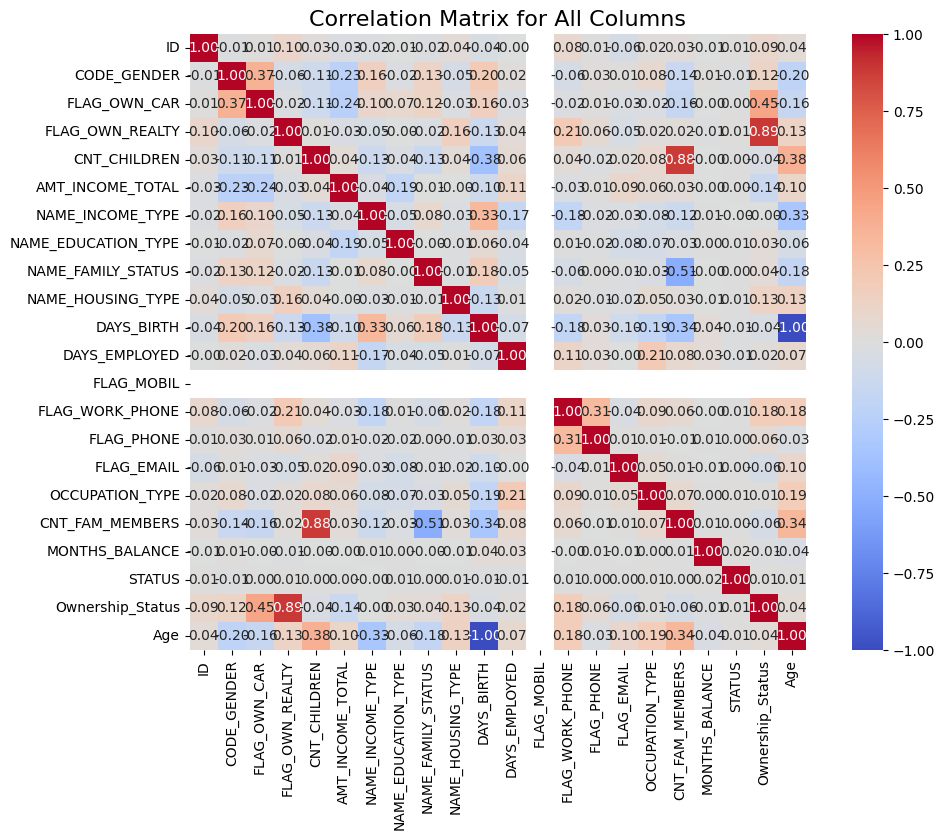

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Add title
plt.title('Correlation Matrix for All Columns', fontsize=16)

# Show the plot
plt.show()


In [38]:
# Drop the useless columns from the dataset
merged_data = merged_data.drop(columns=['ID', 'FLAG_PHONE'], errors='ignore')

# Check the updated dataset
merged_data.head()


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Ownership_Status,Age
0,0,0,0,0.0,380250.0,0,0,0,0,12005,4542.0,1,1,0,0,2.0,0,0,0,-32.867899
1,0,0,0,0.0,380250.0,0,0,0,0,12005,4542.0,1,1,0,0,2.0,1,0,0,-32.867899
2,0,0,0,0.0,380250.0,0,0,0,0,12005,4542.0,1,1,0,0,2.0,2,0,0,-32.867899
3,0,0,0,0.0,380250.0,0,0,0,0,12005,4542.0,1,1,0,0,2.0,3,0,0,-32.867899
4,0,0,0,0.0,380250.0,0,0,0,0,12005,4542.0,1,1,0,0,2.0,4,0,0,-32.867899


In [39]:
merged_data['STATUS'] = status_col 

In [40]:
# Install necessary libraries
# !pip install imbalanced-learn scikit-learn pandas

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import pandas as pd
# since the classes of "STATUS" column are imbalanced 
# Step 1: Oversampling using RandomOverSampler from imbalanced-learn
X = merged_data.drop(columns=['STATUS'])  # Features
y = merged_data['STATUS']  # Target variable

# Oversample to balance the classes in 'STATUS'
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Combine the oversampled data
oversampled_credit_card = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), 
                                     pd.DataFrame(y_resampled, columns=['STATUS'])], axis=1)

# Step 2: Scaling using StandardScaler from sklearn
scaler = StandardScaler()
scaled_features = scaler.fit_transform(oversampled_credit_card.drop(columns=['STATUS']))

# Combine scaled features with the target column
scaled_credit_card = pd.DataFrame(scaled_features, columns=X.columns)
scaled_credit_card['STATUS'] = oversampled_credit_card['STATUS'].reset_index(drop=True)

# View the first few rows of the scaled data
print(scaled_credit_card.head())

# Check the class distribution after oversampling
print(scaled_credit_card['STATUS'].value_counts())


   CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0    -1.341934     -1.265999         -0.74708      -0.61638          2.385789   
1    -1.341934     -1.265999         -0.74708      -0.61638          2.385789   
2    -1.341934     -1.265999         -0.74708      -0.61638          2.385789   
3    -1.341934     -1.265999         -0.74708      -0.61638          2.385789   
4    -1.341934     -1.265999         -0.74708      -0.61638          2.385789   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0         -0.839562            -1.364566           -1.531751   
1         -0.839562            -1.364566           -1.531751   
2         -0.839562            -1.364566           -1.531751   
3         -0.839562            -1.364566           -1.531751   
4         -0.839562            -1.364566           -1.531751   

   NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
0          -1.846227    -0.93794       1.158144 

Accuracy: 0.56
Confusion Matrix:
[[130026  99816]
 [103822 126020]]
Precision: 0.56
Recall: 0.55
F1 Score: 0.55


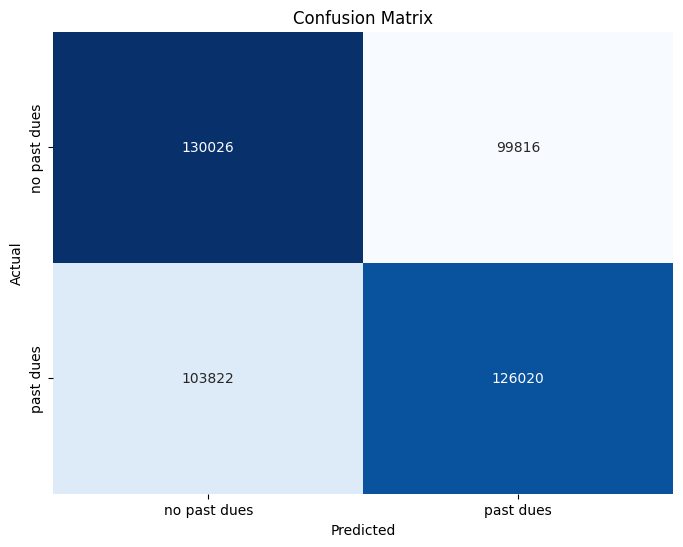

In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets (70% training, 30% testing)
X = scaled_credit_card.drop(columns=['STATUS'])  # Features
y = scaled_credit_card['STATUS']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Fit logistic regression model on training data
logit_model = LogisticRegression(max_iter=1000, random_state=123)
logit_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = logit_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred_classes = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to 0 or 1

# Convert numeric predictions to categorical labels
y_pred_labels = np.where(y_pred_classes == 1, "past dues", "no past dues")

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels, labels=["no past dues", "past dues"])
print("Confusion Matrix:")
print(conf_matrix)

# Compute evaluation metrics
precision = precision_score(y_test, y_pred_labels, pos_label="past dues")
recall = recall_score(y_test, y_pred_labels, pos_label="past dues")
f1 = f1_score(y_test, y_pred_labels, pos_label="past dues")

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=["no past dues", "past dues"], 
                              columns=["no past dues", "past dues"])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




Confusion Matrix:
 [[219370  10815]
 [     0 229499]]
Accuracy: 0.98
Precision: 0.95
Recall: 1.00
F1 Score: 0.98


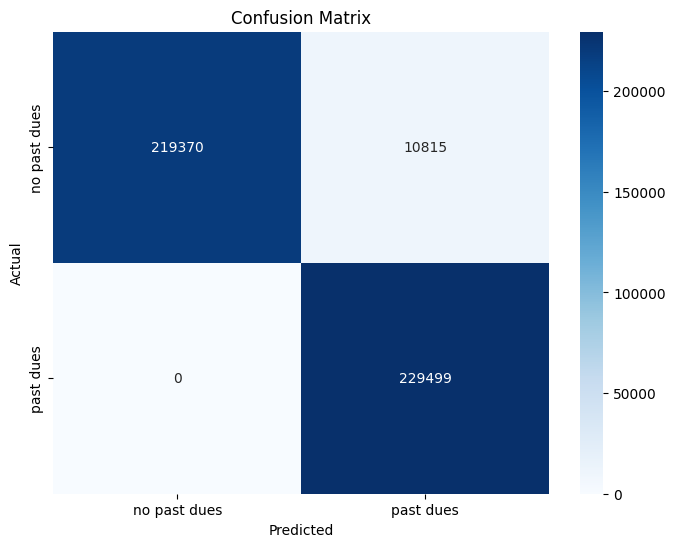

In [47]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the STATUS column to categorical
scaled_credit_card['STATUS'] = scaled_credit_card['STATUS'].astype('category')

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = scaled_credit_card.drop(columns=['STATUS'])
y = scaled_credit_card['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=300)

# Train a Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=500,  # Number of trees
    max_features=10,   # Number of features to consider at each split
    min_samples_leaf=5,  # Minimum samples per leaf node
    random_state=300
)

rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='past dues', average='binary')
recall = recall_score(y_test, y_pred, pos_label='past dues', average='binary')
f1 = f1_score(y_test, y_pred, pos_label='past dues', average='binary')


# Print metrics
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.95
Precision: 0.92
Recall: 0.99
F1 Score: 0.95


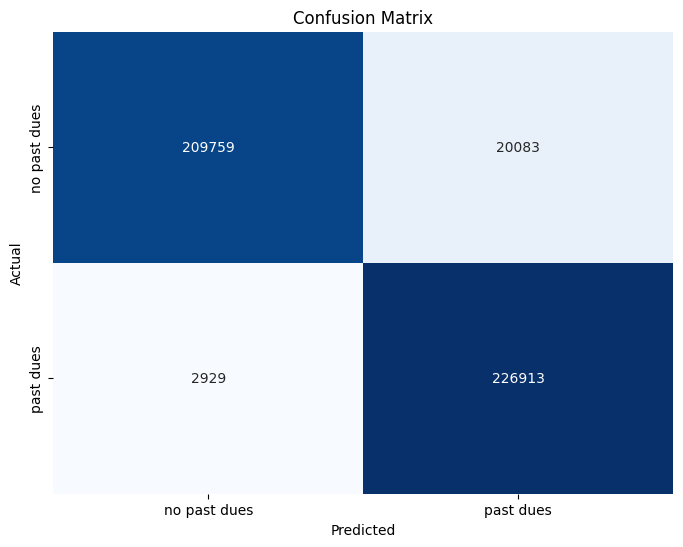

In [50]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
np.random.seed(500)

# Shuffle the data (assuming `scaled_credit_card` is already defined)
scaled_credit_card = scaled_credit_card.sample(frac=1).reset_index(drop=True)

# Split the data into training and testing sets
train_data, test_data = train_test_split(scaled_credit_card, test_size=0.3, random_state=500, stratify=scaled_credit_card['STATUS'])

# Prepare feature matrix and labels
X_train = train_data.drop(columns=['STATUS'])
y_train = (train_data['STATUS'] == 'past dues').astype(int)  # Convert to binary (0 or 1)

X_test = test_data.drop(columns=['STATUS'])
y_test = (test_data['STATUS'] == 'past dues').astype(int)  # Convert to binary (0 or 1)

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=4000, 
    learning_rate=0.01, 
    max_depth=10, 
    min_child_weight=5, 
    subsample=0.6, 
    colsample_bytree=0.6, 
    gamma=0.5, 
    reg_lambda=1, 
    reg_alpha=0.01,
    random_state=500
)

xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_probs = xgb_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
y_pred_class = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy:.2f}")

# Compute precision, recall, and F1 score
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot confusion matrix with numbers
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['no past dues', 'past dues'], 
                              columns=['no past dues', 'past dues'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
